<a href="https://colab.research.google.com/github/777tharun7/Stock_Price_Predictor/blob/main/Stock_Price_Predictor_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# Install required libraries
!pip install pandas numpy scikit-learn tensorflow matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [49]:

import pandas as pd
from IPython.display import display

stocks = pd.read_csv('google.csv')
display(stocks.head())


,Date,Open,High,Low,Close,Volume
0,30-Jun-17,943.99,945.00,929.61,929.68,2287662
1,29-Jun-17,951.35,951.66,929.60,937.82,3206674
2,28-Jun-17,950.66,963.24,936.16,961.01,2745568
3,27-Jun-17,961.60,967.22,947.09,948.09,2443602
4,26-Jun-17,990.00,993.99,970.33,972.09,1517912


In [50]:
# Step 2: Read the CSV
df = pd.read_csv('google.csv')

In [51]:
# Step 3: Preprocess the data
# Convert 'Date' to datetime and sort in ascending order
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
df = df.sort_values('Date')

In [52]:
# Use only the 'Close' column for prediction
data = df[['Close']].values

In [53]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [54]:
# Step 4: Create sequences
sequence_length = 60  # Use previous 60 days to predict next day
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [55]:
# Step 5: Split into train and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)


x_train (2468, 60, 1)
y_train (2468,)
x_test (617, 60, 1)
y_test (617,)


In [56]:
# Step 6: Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [57]:
# Step 7: Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0165 - val_loss: 9.3979e-04
Epoch 2/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.5935e-04 - val_loss: 0.0011
Epoch 3/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 8.8141e-04 - val_loss: 7.3636e-04
Epoch 4/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7.2422e-04 - val_loss: 0.0017
Epoch 5/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.3481e-04 - val_loss: 0.0020
Epoch 6/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.6155e-04 - val_loss: 0.0014
Epoch 7/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.8682e-04 - val_loss: 0.0013
Epoch 8/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.6032e-04 - val_loss: 0.0029
Epoch 9/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.8375e-04 - val_loss: 9.6033e-04
Epoch 10/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.3772e-04 - val_loss: 0.0012
Epoch 11/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.3213e-04 - val_loss: 0.0011
Epoch 12/20
78/78

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


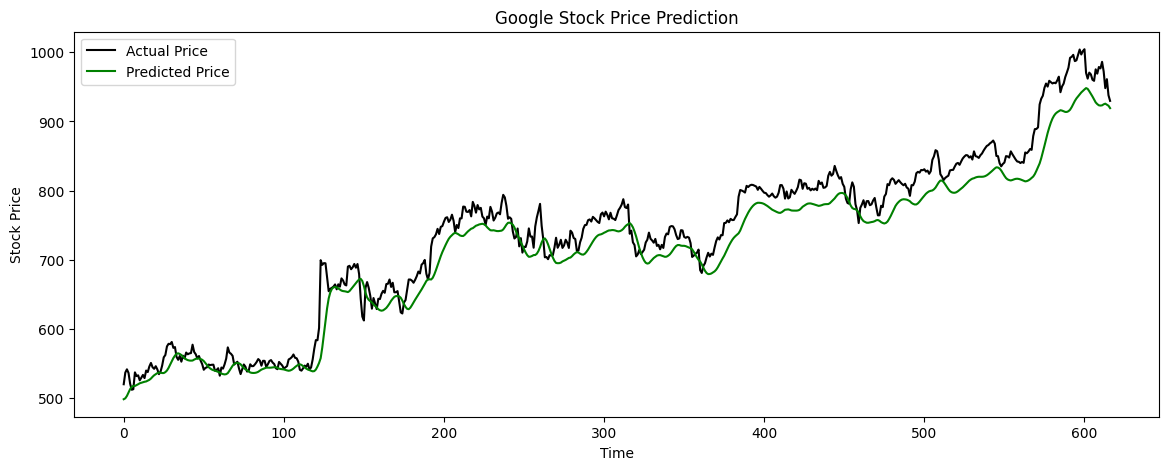

In [58]:
# Step 8: Predict and plot
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
real = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(14,5))
plt.plot(real, color='black', label='Actual Price')
plt.plot(predicted, color='green', label='Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

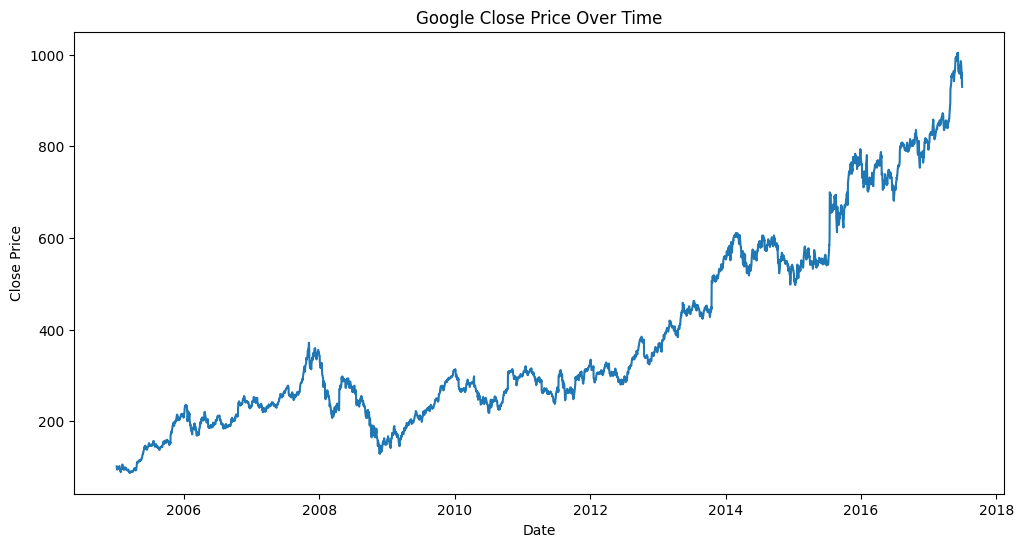

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Upload your CSV first if needed
# from google.colab import files
# uploaded = files.upload()

df = pd.read_csv('google.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
df = df.sort_values('Date')

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'])
plt.title('Google Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


**Step 1:** Load the preprocessed data

In [60]:


# Evaluate on training data
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

# Evaluate on test data
testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))


Train Score: 0.00012338 MSE (0.01110775 RMSE)
Test Score: 0.00116195 MSE (0.03408742 RMSE)


In [61]:
# Predict the next day's closing price
last_60_days = scaled_data[-60:]
last_60_days = np.reshape(last_60_days, (1, 60, 1))
next_pred_scaled = model.predict(last_60_days)
next_pred = scaler.inverse_transform(next_pred_scaled)
print("Predicted next closing price:", next_pred[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted next closing price: 914.3106


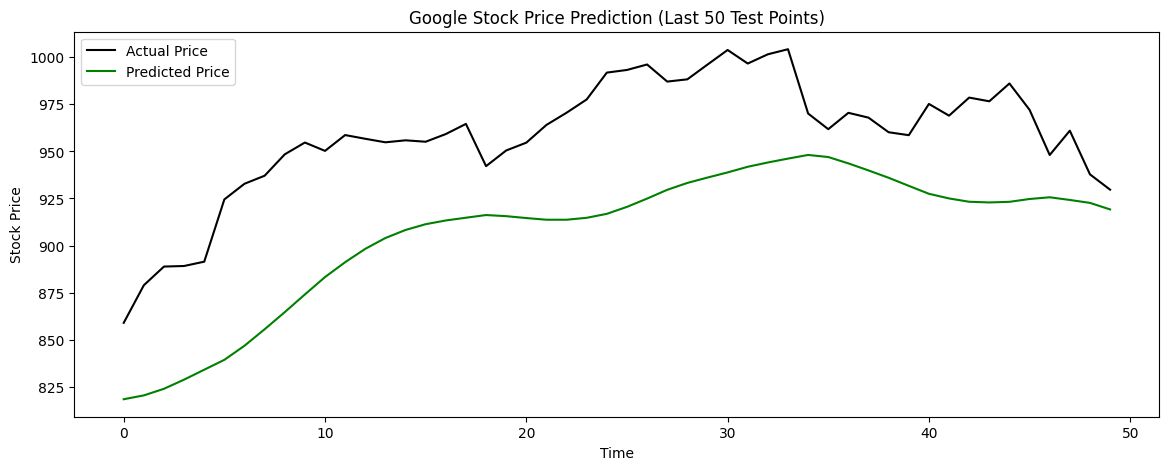

In [62]:
plt.figure(figsize=(14,5))
plt.plot(real[-50:], color='black', label='Actual Price')
plt.plot(predicted[-50:], color='green', label='Predicted Price')
plt.title('Google Stock Price Prediction (Last 50 Test Points)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [63]:
# Save your trained model to an H5 file
model.save('google_lstm_model.h5')
print("Model saved as google_lstm_model.h5")


Model saved as google_lstm_model.h5


In [64]:
from google.colab import files
files.download('google_lstm_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
from tensorflow.keras.models import load_model
model = load_model('google_lstm_model.h5')


In [66]:
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,653 (119.74 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)